# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [4]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

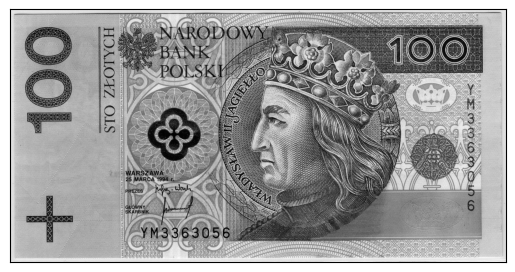

In [5]:
cash_image = cv2.cvtColor(cv2.imread("100zloty.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(cash_image)
plt.gray()
plt.xticks([])
plt.yticks([])
plt.show()

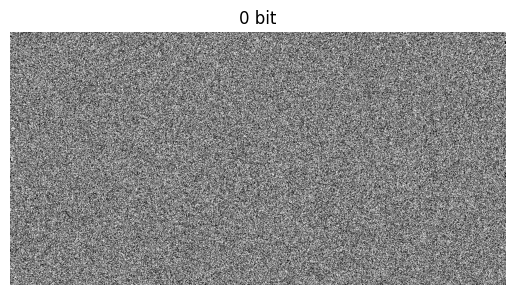

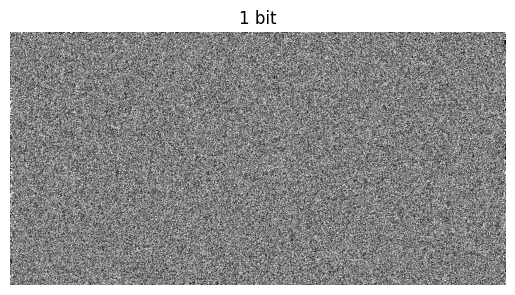

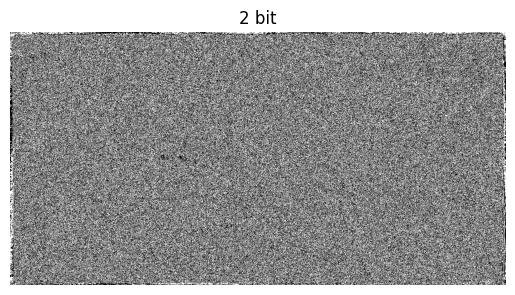

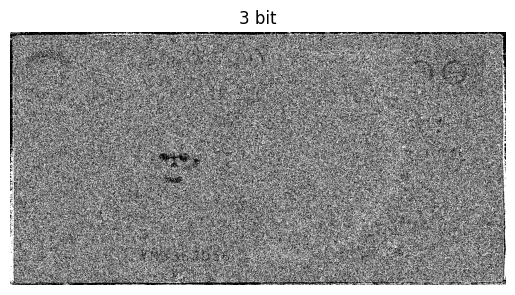

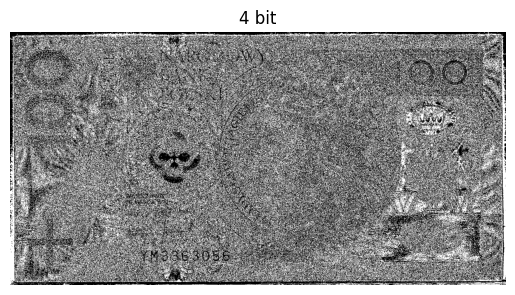

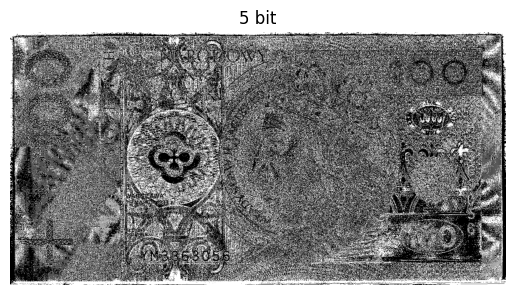

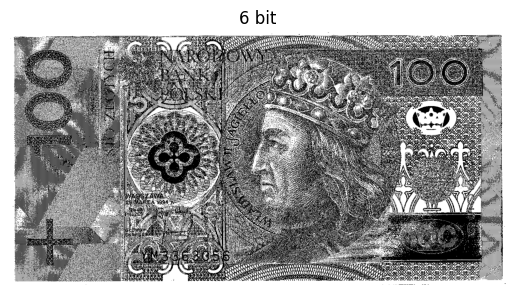

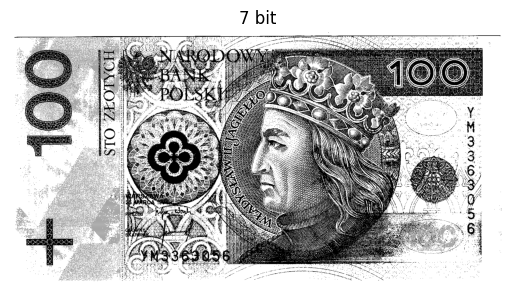

In [9]:
decomposed = []

for i in range(8):
        bit_mask = 1 << i
        
        decomposed.append(((cash_image & bit_mask) >> i) * 255)

for i, dec in enumerate(decomposed):
    plt.imshow(dec, cmap='gray')
    plt.title(f'{i} bit')
    plt.axis("off")
    plt.show()

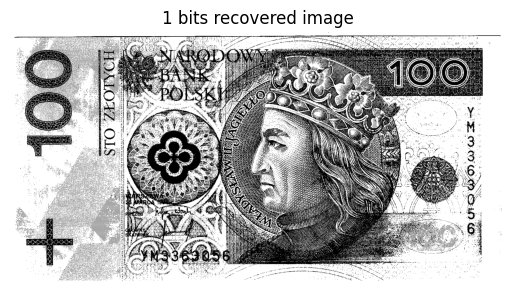

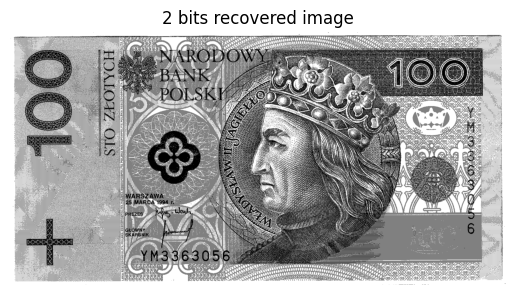

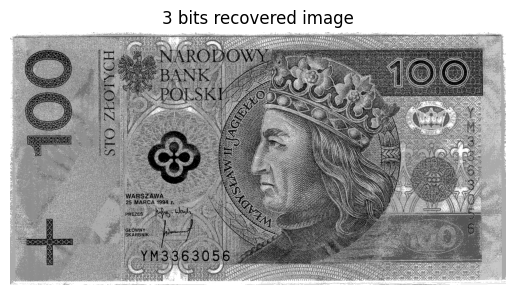

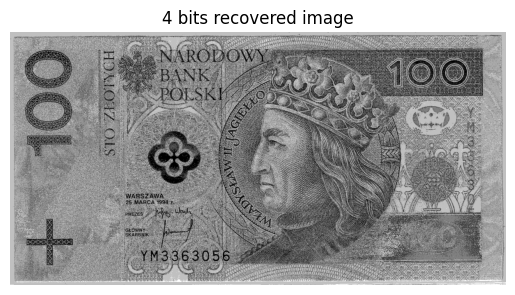

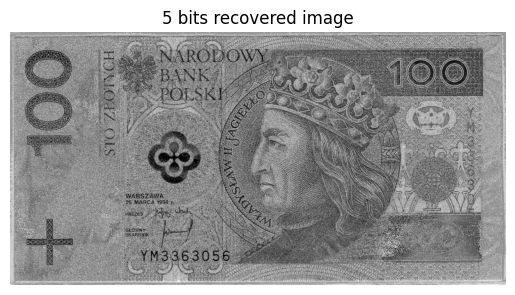

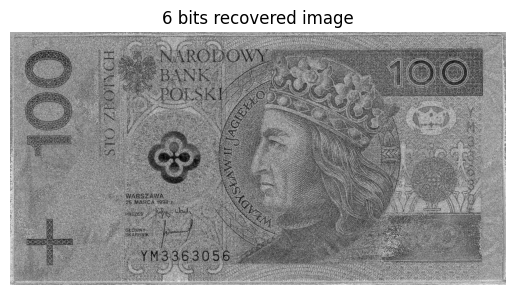

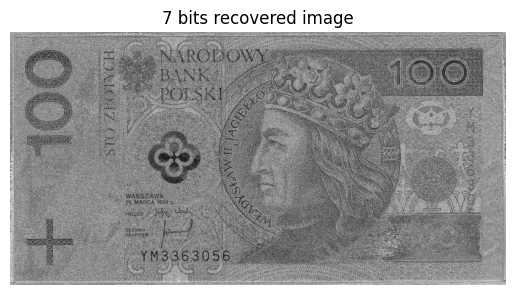

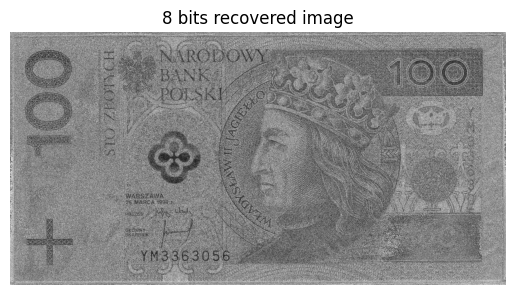

In [10]:
for bits in range(1, 9):
    recovered = np.sum(decomposed[-bits:], axis=0)
    
    plt.imshow(recovered, cmap='gray')
    plt.title(f'{bits} bits recovered image')
    plt.axis("off")
    plt.show()